In [31]:
from sklearn.feature_extraction.text import CountVectorizer 

v = CountVectorizer(ngram_range=(2,2))
v.fit(["Thor Hathodwala is looking for a job"])
v.vocabulary_ 

{'thor hathodwala': 4,
 'hathodwala is': 1,
 'is looking': 2,
 'looking for': 3,
 'for job': 0}

In [32]:
corpus = [
    "Thor ate pizza",
    "loki is tall",
    "loki is eating pizza"
]

In [33]:
import spacy

#load english language model and crate nlp object from it 
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)

    filtered_tokens = []

    for token in doc:
        if token.is_stop or token.is_punct :
            continue

        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

preprocess("Thor ate pizza")

'thor eat pizza'

In [34]:
corpus_processed = [preprocess(text) for  text in corpus]
corpus_processed

['thor eat pizza', 'loki tall', 'loki eat pizza']

In [35]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [36]:
v.transform(["Thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]])

In [37]:
import pandas as pd 

df = pd.read_json("news_dataset.json")

print(df.shape)

df.head()

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [38]:
import pandas as pd 

df1 = pd.read_json("news_category_dataset.json", lines = True)

print(df1.shape)

df1.head()

(124989, 6)


,short_description,headline,date,link,authors,category
0,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,2018-05-26,https://www.huffingtonpost.com/entry/texas-ama...,Melissa Jeltsen,CRIME
1,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,2018-05-26,https://www.huffingtonpost.com/entry/will-smit...,Andy McDonald,ENTERTAINMENT
2,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 57,2018-05-26,https://www.huffingtonpost.com/entry/hugh-gran...,Ron Dicker,ENTERTAINMENT
3,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,2018-05-26,https://www.huffingtonpost.com/entry/jim-carre...,Ron Dicker,ENTERTAINMENT
4,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...,2018-05-26,https://www.huffingtonpost.com/entry/julianna-...,Ron Dicker,ENTERTAINMENT


In [39]:
df.category.value_counts()

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

In [40]:
df1.category.value_counts()

category
POLITICS          32739
ENTERTAINMENT     14257
HEALTHY LIVING     6694
QUEER VOICES       4995
BUSINESS           4254
SPORTS             4167
COMEDY             3971
PARENTS            3955
BLACK VOICES       3858
THE WORLDPOST      3664
WOMEN              3490
CRIME              2893
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
IMPACT             2602
WORLDPOST          2579
RELIGION           2556
STYLE              2254
WORLD NEWS         2177
TRAVEL             2145
TASTE              2096
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
SCIENCE            1381
ARTS & CULTURE     1339
TECH               1231
COLLEGE            1144
LATINO VOICES      1129
EDUCATION          1004
Name: count, dtype: int64

In [44]:
# As you can see the both teh data set you can see that there is a lot of imbaalance in the data so we need to use some technequies oen is undersampling just taking it to solve just to learn :

min_samples = 1381

# Undersample each category to have min_samples
df_business = df[df.category == "BUSINESS"].sample(min_samples, random_state=2022)
df_sports = df[df.category == "SPORTS"].sample(min_samples, random_state=2022)
df_crime = df[df.category == "CRIME"].sample(min_samples, random_state=2022)
df_science = df[df.category == "SCIENCE"].sample(min_samples, random_state=2022)

# Combine the undersampled DataFrames into one
df2 = pd.concat([df_business, df_sports, df_crime, df_science])

# Shuffle the combined DataFrame
df2 = df2.sample(frac=1, random_state=2022).reset_index(drop=True)

print(df2.shape)
df2.head()


(5524, 2)


,text,category
0,Man Charged In Disappearance Of North Carolina...,CRIME
1,Polls of Future Past: A History of Public Expe...,SCIENCE
2,Ball: Good Or Bad For Black Fathers? The deten...,SPORTS
3,More Findings Of CTE In The NFL Some NFL playe...,SPORTS
4,Watch This Corpse Flower Bloom Or Else Wait An...,SCIENCE


In [ ]:
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [45]:
df2['category'].value_counts()

category
CRIME       1381
SCIENCE     1381
SPORTS      1381
BUSINESS    1381
Name: count, dtype: int64

In [49]:
#lets create a number for each of the values :

df2['category_num'] = df2.category.map({
"BUSINESS" : 0,
"SPORTS" : 1, 
"SCIENCE" : 2,
"CRIME" : 3,
})


In [50]:
df2.head()

,text,category,category_num
0,Man Charged In Disappearance Of North Carolina...,CRIME,3
1,Polls of Future Past: A History of Public Expe...,SCIENCE,2
2,Ball: Good Or Bad For Black Fathers? The deten...,SPORTS,1
3,More Findings Of CTE In The NFL Some NFL playe...,SPORTS,1
4,Watch This Corpse Flower Bloom Or Else Wait An...,SCIENCE,2


In [51]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
    df2.text,
    df2.category_num, 
test_size = 0.2,
random_state=2022,
stratify=df2.category_num
)

In [52]:
print(X_train.shape)
X_train.head()

(4419,)


238     Grand Jury Recommends No Charges Against Atlan...
521     Grandpa Leaves Girl In Desert With Gun To Get ...
915                    Arian Foster: 1; Houston Media: 0 
4762       NASA Astronauts' GoPro Captures ISS Spacewalk 
552     Recollections of the Big Bang About 13.8 billi...
Name: text, dtype: object

In [53]:
y_train.value_counts()


category_num
3    1105
2    1105
0    1105
1    1104
Name: count, dtype: int64

In [54]:
y_test.value_counts()

category_num
1    277
0    276
3    276
2    276
Name: count, dtype: int64

In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ("vectorizer_bow", CountVectorizer()),
    ('Multi NB', MultinomialNB())

])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       276
           1       0.91      0.88      0.90       277
           2       0.94      0.81      0.87       276
           3       0.88      0.89      0.89       276

    accuracy                           0.87      1105
   macro avg       0.88      0.87      0.87      1105
weighted avg       0.88      0.87      0.87      1105



In [57]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ("vectorizer_bow", CountVectorizer(ngram_range = (1,2))),
    ('Multi NB', MultinomialNB())

])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       276
           1       0.90      0.81      0.85       277
           2       0.94      0.76      0.84       276
           3       0.89      0.85      0.87       276

    accuracy                           0.83      1105
   macro avg       0.85      0.83      0.84      1105
weighted avg       0.85      0.83      0.84      1105



In [58]:
X_test[:5]

1750    Martin Shkreli's Successor Had His Own Issues ...
3130    Child Sex Offender Awarded Joint Custody Of Vi...
3194    Suspect Tells Cops Stabbing People 'Better Tha...
582     Takata Air Bag Defect Tied To Another Death At...
401     Scientists Discover Feathered Dinosaur Tail Tr...
Name: text, dtype: object

In [59]:
y_test[:5]

1750    0
3130    3
3194    3
582     0
401     2
Name: category_num, dtype: int64

In [60]:
y_pred[:5]

array([0, 3, 3, 3, 2])

In [64]:
#This will take lot of time but it will run at the end :

df2['preprocessed_txt'] = df2.text.apply(preprocess)

In [63]:
df2.head()

,text,category,category_num,preprocessed_txt
0,Man Charged In Disappearance Of North Carolina...,CRIME,3,man charge Disappearance North Carolina Toddle...
1,Polls of Future Past: A History of Public Expe...,SCIENCE,2,poll Future Past history Public Expectations F...
2,Ball: Good Or Bad For Black Fathers? The deten...,SPORTS,1,ball Good Bad Black Fathers detention LiAngelo...
3,More Findings Of CTE In The NFL Some NFL playe...,SPORTS,1,finding CTE NFL NFL player wait find future
4,Watch This Corpse Flower Bloom Or Else Wait An...,SCIENCE,2,watch Corpse Flower Bloom wait 5 year Stinky P...


In [65]:

X_train, X_test, y_train, y_test = train_test_split(
    df2.preprocessed_txt,
    df2.category_num, 
test_size = 0.2,
random_state=2022,
stratify=df2.category_num
)

In [66]:
clf = Pipeline([
    ("vectorizer_bow", CountVectorizer(ngram_range = (1,2))),
    ('Multi NB', MultinomialNB())

])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       276
           1       0.89      0.88      0.88       277
           2       0.94      0.80      0.87       276
           3       0.87      0.93      0.90       276

    accuracy                           0.88      1105
   macro avg       0.88      0.88      0.88      1105
weighted avg       0.88      0.88      0.88      1105



In [67]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
cm

array([[246,  15,   9,   6],
       [ 11, 244,   1,  21],
       [ 34,  10, 222,  10],
       [  7,   6,   5, 258]])

Text(95.72222222222221, 0.5, 'Truth')

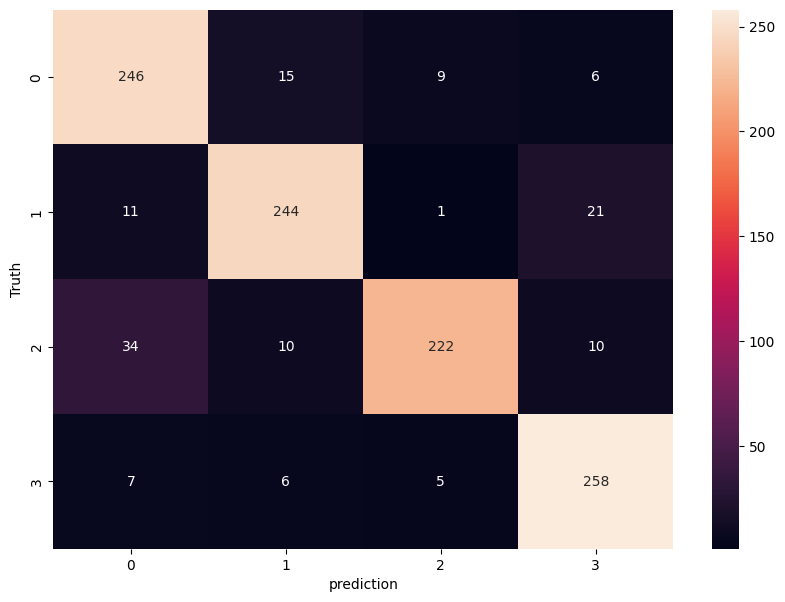

In [69]:
from matplotlib import pyplot as plt 
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm , annot=True, fmt="d")
plt.xlabel("prediction")
plt.ylabel('Truth')